In [1]:
from google.colab import files

uploaded = files.upload()

Saving NVIDIA_Stock_Volatility_2014_2024.csv to NVIDIA_Stock_Volatility_2014_2024.csv


In [2]:
import pandas as pd

# Load the data
stocks = pd.read_csv("NVIDIA_Stock_Volatility_2014_2024.csv")
stocks

,Date,Close,High,Low,Open,Volume,Daily_Return,Rolling_Volatility,ATR,Rolling_Mean,Upper_Band,Lower_Band
0,2014-01-31,0.370194,0.372316,0.365242,0.365478,335348000,-0.001272,0.016288,0.007461,0.372964,0.385216,0.360713
1,2014-02-03,0.365242,0.373259,0.363827,0.372787,431728000,-0.013376,0.016343,0.007293,0.372752,0.385398,0.360106
2,2014-02-04,0.367364,0.368071,0.363120,0.365006,280692000,0.005810,0.016091,0.006787,0.372398,0.385240,0.359557
3,2014-02-05,0.364063,0.365949,0.361233,0.364770,214676000,-0.008986,0.015657,0.006838,0.371573,0.384325,0.358821
4,2014-02-06,0.368779,0.369722,0.364063,0.364535,168380000,0.012953,0.015622,0.006990,0.370724,0.381627,0.359821
...,...,...,...,...,...,...,...,...,...,...,...,...
2536,2024-02-29,79.089577,79.967326,78.327792,79.071584,507289000,0.018658,0.043006,3.435667,72.529888,82.126502,62.933274
2537,2024-03-01,82.255676,82.276674,79.412481,79.977323,479135000,0.040032,0.043356,3.481655,73.492215,82.927602,64.056827
2538,2024-03-04,85.212837,87.670141,83.695270,84.106149,615616000,0.035951,0.042870,3.628399,74.445794,84.581983,64.309604
2539,2024-03-05,85.943665,86.076636,83.397270,85.249828,520639000,0.008576,0.042105,3.546289,75.277359,86.327912,64.226807


In [3]:
# Summary statistics
print("Summary Statistics:")
stocks.describe()

Summary Statistics:


,Close,High,Low,Open,Volume,Daily_Return,Rolling_Volatility,ATR,Rolling_Mean,Upper_Band,Lower_Band
count,2541.000000,2541.000000,2541.000000,2541.000000,2.541000e+03,2541.000000,2541.000000,2541.000000,2541.000000,2541.000000,2541.000000
mean,11.104996,11.293830,10.890524,11.094145,4.608275e+08,0.002584,0.026557,0.436025,10.809489,11.980233,9.638746
std,13.913558,14.133682,13.646661,13.891535,2.551542e+08,0.029373,0.012419,0.554386,13.240537,14.776951,11.758642
min,0.364063,0.365949,0.361233,0.364535,4.564400e+07,-0.187559,0.005627,0.006787,0.370724,0.381627,0.331451
25%,1.442168,1.459846,1.426946,1.444581,2.972020e+08,-0.011417,0.018016,0.033077,1.363935,1.462772,1.265097
50%,5.315171,5.403907,5.231772,5.331492,4.083040e+08,0.002386,0.023073,0.166488,5.273909,5.908683,4.773117
75%,15.393862,15.710562,15.107141,15.366314,5.552200e+08,0.016495,0.033729,0.657710,15.459655,17.437659,13.311766
max,88.679016,89.702776,87.009413,88.001183,3.692928e+09,0.298067,0.087022,3.650700,76.301127,88.341849,64.309604


In [4]:
#Dataset info
stocks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2541 entries, 0 to 2540
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                2541 non-null   object 
 1   Close               2541 non-null   float64
 2   High                2541 non-null   float64
 3   Low                 2541 non-null   float64
 4   Open                2541 non-null   float64
 5   Volume              2541 non-null   int64  
 6   Daily_Return        2541 non-null   float64
 7   Rolling_Volatility  2541 non-null   float64
 8   ATR                 2541 non-null   float64
 9   Rolling_Mean        2541 non-null   float64
 10  Upper_Band          2541 non-null   float64
 11  Lower_Band          2541 non-null   float64
dtypes: float64(10), int64(1), object(1)
memory usage: 238.3+ KB


DATA CLEANING

In [5]:
import pandas as pd
import numpy as np

# Check for missing values and remove them
stocks = stocks.dropna()

# Remove duplicates
stocks = stocks.drop_duplicates()

print("\nMissing values after processing:")
print(stocks.isnull().sum())


Missing values after processing:
Date                  0
Close                 0
High                  0
Low                   0
Open                  0
Volume                0
Daily_Return          0
Rolling_Volatility    0
ATR                   0
Rolling_Mean          0
Upper_Band            0
Lower_Band            0
dtype: int64


In [6]:
# Detect and remove extreme outliers using Z-score
import numpy as np

from scipy.stats import zscore
z_scores = np.abs(zscore(stocks.select_dtypes(include=[np.number])))  # Apply Z-score only on numerical columns
stocks = stocks[(z_scores < 3).all(axis=1)]  # Keep only rows where Z-score < 3

# Ensure correct data types
stocks = stocks.astype({
    "Open": "float64",
    "High": "float64",
    "Low": "float64",
    "Close": "float64",
    "Volume": "int64"
})

# Print final cleaned dataset info
print("Final cleaned dataset:")
print(stocks.info())

# Save cleaned data
stocks.to_csv("cleaned_NVDA_stock_data.csv")

Final cleaned dataset:
<class 'pandas.core.frame.DataFrame'>
Index: 2376 entries, 0 to 2475
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                2376 non-null   object 
 1   Close               2376 non-null   float64
 2   High                2376 non-null   float64
 3   Low                 2376 non-null   float64
 4   Open                2376 non-null   float64
 5   Volume              2376 non-null   int64  
 6   Daily_Return        2376 non-null   float64
 7   Rolling_Volatility  2376 non-null   float64
 8   ATR                 2376 non-null   float64
 9   Rolling_Mean        2376 non-null   float64
 10  Upper_Band          2376 non-null   float64
 11  Lower_Band          2376 non-null   float64
dtypes: float64(10), int64(1), object(1)
memory usage: 241.3+ KB
None


In [7]:
# Convert the 'Date' column to datetime format
stocks['Date'] = pd.to_datetime(stocks['Date'])

# (Optional) Sort by date just to ensure order
stocks = stocks.sort_values(by='Date')

# Check result
print(stocks.dtypes)  # To verify 'Date' is now datetime
stocks.head()  # Preview the updated dataframe

Date                  datetime64[ns]
Close                        float64
High                         float64
Low                          float64
Open                         float64
Volume                         int64
Daily_Return                 float64
Rolling_Volatility           float64
ATR                          float64
Rolling_Mean                 float64
Upper_Band                   float64
Lower_Band                   float64
dtype: object


,Date,Close,High,Low,Open,Volume,Daily_Return,Rolling_Volatility,ATR,Rolling_Mean,Upper_Band,Lower_Band
0,2014-01-31,0.370194,0.372316,0.365242,0.365478,335348000,-0.001272,0.016288,0.007461,0.372964,0.385216,0.360713
1,2014-02-03,0.365242,0.373259,0.363827,0.372787,431728000,-0.013376,0.016343,0.007293,0.372752,0.385398,0.360106
2,2014-02-04,0.367364,0.368071,0.363120,0.365006,280692000,0.005810,0.016091,0.006787,0.372398,0.385240,0.359557
3,2014-02-05,0.364063,0.365949,0.361233,0.364770,214676000,-0.008986,0.015657,0.006838,0.371573,0.384325,0.358821
4,2014-02-06,0.368779,0.369722,0.364063,0.364535,168380000,0.012953,0.015622,0.006990,0.370724,0.381627,0.359821


In [8]:
# Sort the dataset by date in ascending order
stocks = stocks.sort_values(by='Date', ascending=True)

# Reset the index after sorting
stocks = stocks.reset_index(drop=True)

# Check the result
stocks.head()

,Date,Close,High,Low,Open,Volume,Daily_Return,Rolling_Volatility,ATR,Rolling_Mean,Upper_Band,Lower_Band
0,2014-01-31,0.370194,0.372316,0.365242,0.365478,335348000,-0.001272,0.016288,0.007461,0.372964,0.385216,0.360713
1,2014-02-03,0.365242,0.373259,0.363827,0.372787,431728000,-0.013376,0.016343,0.007293,0.372752,0.385398,0.360106
2,2014-02-04,0.367364,0.368071,0.363120,0.365006,280692000,0.005810,0.016091,0.006787,0.372398,0.385240,0.359557
3,2014-02-05,0.364063,0.365949,0.361233,0.364770,214676000,-0.008986,0.015657,0.006838,0.371573,0.384325,0.358821
4,2014-02-06,0.368779,0.369722,0.364063,0.364535,168380000,0.012953,0.015622,0.006990,0.370724,0.381627,0.359821


OUTLIER DETECTION

In [9]:
import pandas as pd

# Load and preprocess as before
df = pd.read_csv("NVIDIA_Stock_Volatility_2014_2024.csv")
df['Date'] = pd.to_datetime(df['Date'])

# Columns to check for outliers
columns_to_check = ['Close', 'High', 'Low', 'Open', 'Volume',
                    'Daily_Return', 'Rolling_Volatility', 'ATR',
                    'Rolling_Mean', 'Upper_Band', 'Lower_Band']

# Detect outliers using IQR method
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] < lower_bound) | (data[column] > upper_bound)]

# Store all outliers
outliers_dict = {}
for col in columns_to_check:
    outliers = detect_outliers_iqr(df, col)
    outliers_dict[col] = outliers
    print(f"{col}: {len(outliers)} outliers detected")

# Optional: Remove outliers
df_clean = df.copy()
for col in columns_to_check:
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]

print("Final shape after removing outliers:", df_clean.shape)


Close: 196 outliers detected
High: 196 outliers detected
Low: 196 outliers detected
Open: 196 outliers detected
Volume: 111 outliers detected
Daily_Return: 146 outliers detected
Rolling_Volatility: 84 outliers detected
ATR: 117 outliers detected
Rolling_Mean: 183 outliers detected
Upper_Band: 191 outliers detected
Lower_Band: 179 outliers detected
Final shape after removing outliers: (1927, 12)


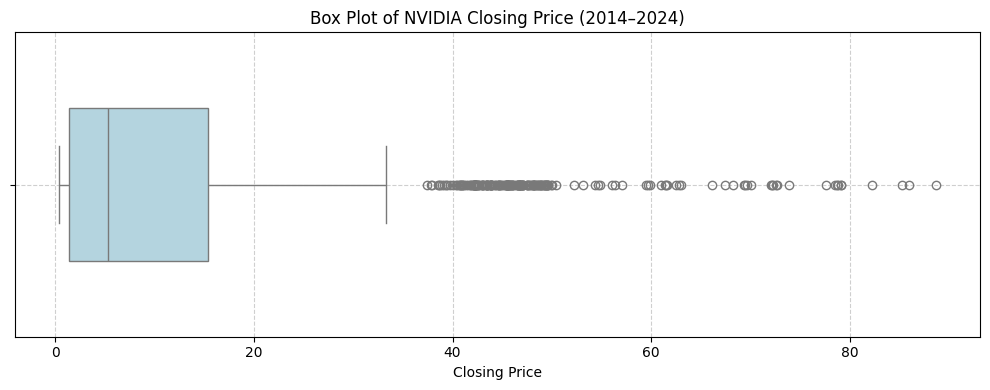

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a boxplot for the 'Close' column
plt.figure(figsize=(10, 4))
sns.boxplot(x=df['Close'], color='lightblue', width=0.5)

plt.title("Box Plot of NVIDIA Closing Price (2014–2024)")
plt.xlabel("Closing Price")
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


Z-score method detected 40 outliers in closing price.


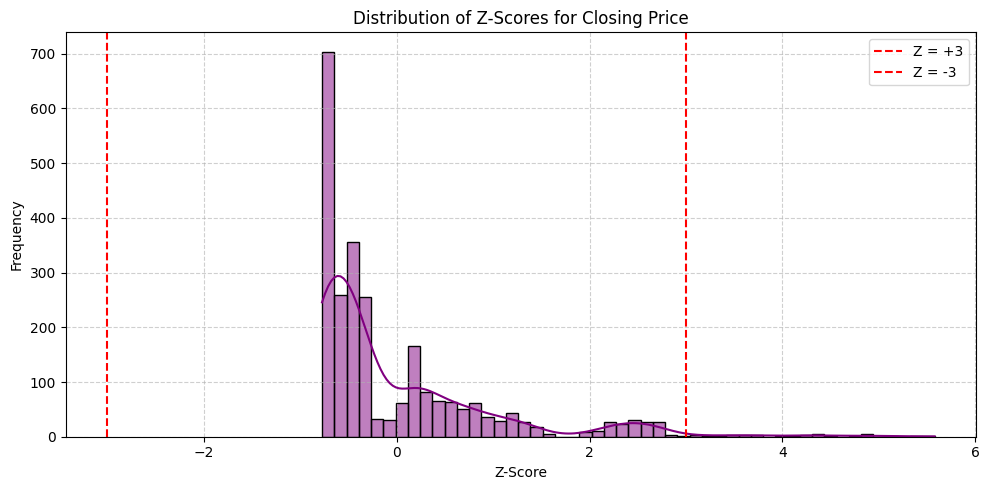

In [11]:
import numpy as np
from scipy.stats import zscore

# Calculate Z-scores for the 'Close' column
df['Close_zscore'] = zscore(df['Close'])

# Define threshold (common choice: 3)
z_threshold = 3
outliers_z = df[np.abs(df['Close_zscore']) > z_threshold]

print(f"Z-score method detected {len(outliers_z)} outliers in closing price.")

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

# Load your data (if not already loaded)
df = pd.read_csv("NVIDIA_Stock_Volatility_2014_2024.csv")
df['Date'] = pd.to_datetime(df['Date'])

# Calculate Z-score for 'Close'
df['Close_zscore'] = zscore(df['Close'])

# Plot the Z-score distribution
plt.figure(figsize=(10, 5))
sns.histplot(df['Close_zscore'], bins=50, kde=True, color='purple')

# Add lines for Z = ±3 (common threshold for outliers)
plt.axvline(x=3, color='red', linestyle='--', label='Z = +3')
plt.axvline(x=-3, color='red', linestyle='--', label='Z = -3')

# Labels and styling
plt.title("Distribution of Z-Scores for Closing Price")
plt.xlabel("Z-Score")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()



CANDLESTICK CHART

In [12]:
import pandas as pd
import plotly.graph_objects as go

# Load your data
stocks = pd.read_csv("NVIDIA_Stock_Volatility_2014_2024.csv")
stocks['Date'] = pd.to_datetime(stocks['Date'])

# Extract year
stocks['Year'] = stocks['Date'].dt.year

# Group by year and plot one candlestick chart per year
unique_years = stocks['Year'].unique()

for year in unique_years:
    yearly_data = stocks[stocks['Year'] == year]

    fig = go.Figure(data=[go.Candlestick(
        x=yearly_data['Date'],
        open=yearly_data['Open'],
        high=yearly_data['High'],
        low=yearly_data['Low'],
        close=yearly_data['Close'],
        increasing_line_color='green',
        decreasing_line_color='red'
    )])

    fig.update_layout(
        title=f"NVDA Candlestick Chart - {year}",
        xaxis_title='Date',
        yaxis_title='Price',
        xaxis_rangeslider_visible=False,
        template='plotly_dark',
        height=600
    )

    fig.show()


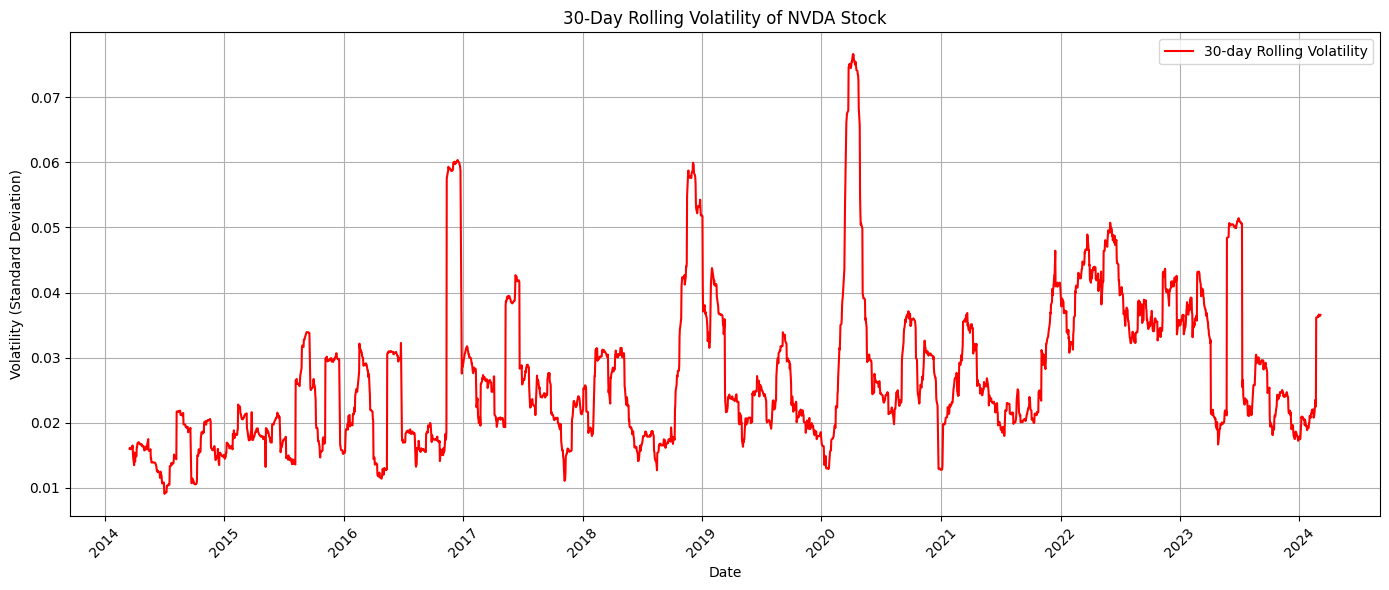

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Load and prepare the dataset
stocks = pd.read_csv("NVIDIA_Stock_Volatility_2014_2024.csv")
stocks['Date'] = pd.to_datetime(stocks['Date'])
stocks = stocks.sort_values('Date').reset_index(drop=True)
stocks.set_index('Date', inplace=True)  # Set Date as index for time series

# Calculate Daily Return
stocks['Daily Return'] = stocks['Close'].pct_change()

# Calculate 30-day rolling volatility (standard deviation of daily returns)
stocks["Volatility"] = stocks["Daily Return"].rolling(window=30).std()

# Plot
plt.figure(figsize=(14, 6))
plt.plot(stocks.index, stocks["Volatility"], color="red", label="30-day Rolling Volatility")
plt.title("30-Day Rolling Volatility of NVDA Stock")
plt.xlabel("Date")
plt.ylabel("Volatility (Standard Deviation)")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


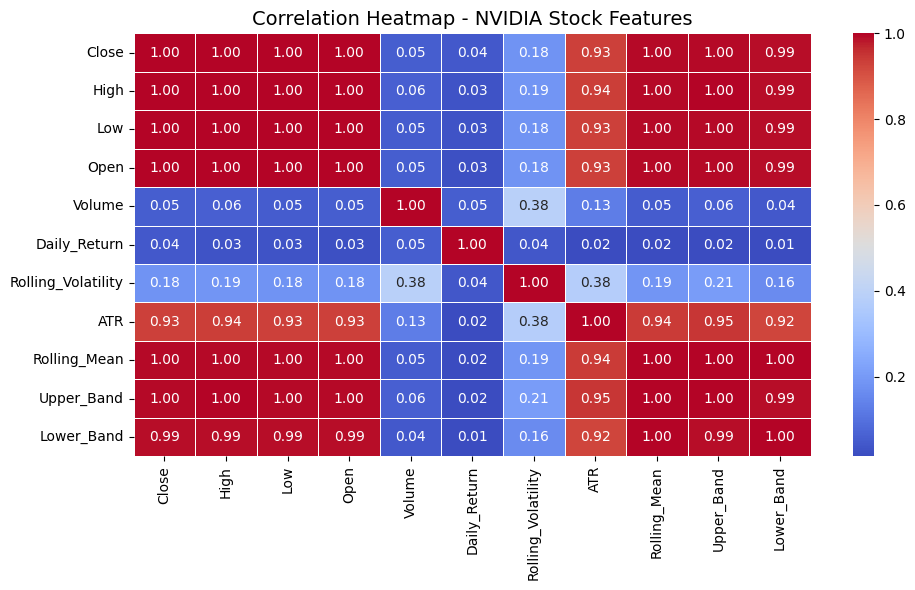

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("NVIDIA_Stock_Volatility_2014_2024.csv")

# Select numeric columns only
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Compute correlation matrix
correlation_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap - NVIDIA Stock Features", fontsize=14)
plt.tight_layout()
plt.show()


MODEL

LSTM

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [16]:
# Load data
df = pd.read_csv("NVIDIA_Stock_Volatility_2014_2024.csv")
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')

# Use only the closing price
close_prices = df['Close'].values.reshape(-1, 1)

# Normalize data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(close_prices)

In [17]:
# Create sequences
sequence_length = 60  # Use past 60 days to predict next
X, y = [], []

for i in range(sequence_length, len(scaled_data)):
    X.append(scaled_data[i-sequence_length:i])
    y.append(scaled_data[i])

X, y = np.array(X), np.array(y)

# Reshape input for LSTM: [samples, time steps, features]
print("X shape:", X.shape)  # (samples, 60, 1)

X shape: (2481, 60, 1)


In [18]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))  # Output layer

model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 60, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,651 (119.73 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
model.fit(X, y, epochs=25, batch_size=32)

Epoch 1/25
78/78 ━━━━━━━━━━━━━━━━━━━━ 10s 56ms/step - loss: 0.0071
Epoch 2/25
78/78 ━━━━━━━━━━━━━━━━━━━━ 5s 62ms/step - loss: 8.2441e-04
Epoch 3/25
78/78 ━━━━━━━━━━━━━━━━━━━━ 4s 54ms/step - loss: 6.3602e-04
Epoch 4/25
78/78 ━━━━━━━━━━━━━━━━━━━━ 5s 66ms/step - loss: 5.2477e-04
Epoch 5/25
78/78 ━━━━━━━━━━━━━━━━━━━━ 9s 55ms/step - loss: 5.2510e-04
Epoch 6/25
78/78 ━━━━━━━━━━━━━━━━━━━━ 6s 69ms/step - loss: 4.9579e-04
Epoch 7/25
78/78 ━━━━━━━━━━━━━━━━━━━━ 10s 66ms/step - loss: 5.3687e-04
Epoch 8/25
78/78 ━━━━━━━━━━━━━━━━━━━━ 4s 56ms/step - loss: 3.7916e-04
Epoch 9/25
78/78 ━━━━━━━━━━━━━━━━━━━━ 5s 55ms/step - loss: 4.3242e-04
Epoch 10/25
78/78 ━━━━━━━━━━━━━━━━━━━━ 6s 69ms/step - loss: 4.1659e-04
Epoch 11/25
78/78 ━━━━━━━━━━━━━━━━━━━━ 4s 55ms/step - loss: 3.8258e-04
Epoch 12/25
78/78 ━━━━━━━━━━━━━━━━━━━━ 6s 66ms/step - loss: 3.5554e-04
Epoch 13/25
78/78 ━━━━━━━━━━━━━━━━━━━━ 9s 54ms/step - loss: 3.2159e-04
Epoch 14/25
78/78 ━━━━━━━━━━━━━━━━━━━━ 6s 68ms/step - loss: 3.7122e-04
Epoch 15/25
78/78

78/78 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step


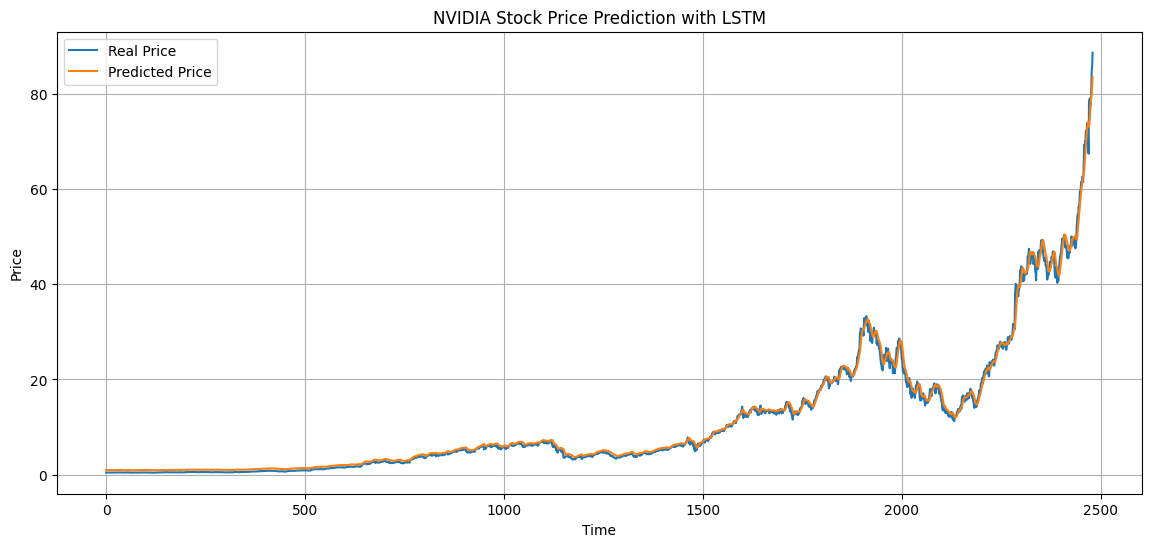

In [20]:
# Predict on the same data (for demo)
predictions = model.predict(X)
predictions = scaler.inverse_transform(predictions)
real_prices = scaler.inverse_transform(y.reshape(-1, 1))

# Plot predictions vs real
plt.figure(figsize=(14, 6))
plt.plot(real_prices, label='Real Price')
plt.plot(predictions, label='Predicted Price')
plt.title('NVIDIA Stock Price Prediction with LSTM')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


In [21]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Real and predicted prices (already inverse transformed)
real_prices = scaler.inverse_transform(y.reshape(-1, 1))
predicted_prices = predictions

# Metrics
rmse = np.sqrt(mean_squared_error(real_prices, predicted_prices))
mae = mean_absolute_error(real_prices, predicted_prices)
mape = np.mean(np.abs((real_prices - predicted_prices) / real_prices)) * 100
r2 = r2_score(real_prices, predicted_prices)

# Display results
print("LSTM Model Performance Metrics:")
print(f"RMSE: {rmse:.2f}")
print(f"MAE : {mae:.2f}")
print(f"MAPE: {mape:.2f}%")
print(f"R² Score: {r2:.4f}")

LSTM Model Performance Metrics:
RMSE: 0.93
MAE : 0.64
MAPE: 25.71%
R² Score: 0.9955


PROPHET

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmplt0ps00d/_75ib6fm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmplt0ps00d/jtdkkh4w.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=39687', 'data', 'file=/tmp/tmplt0ps00d/_75ib6fm.json', 'init=/tmp/tmplt0ps00d/jtdkkh4w.json', 'output', 'file=/tmp/tmplt0ps00d/prophet_modeld17vaclp/prophet_model-20250503170626.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:06:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:06:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


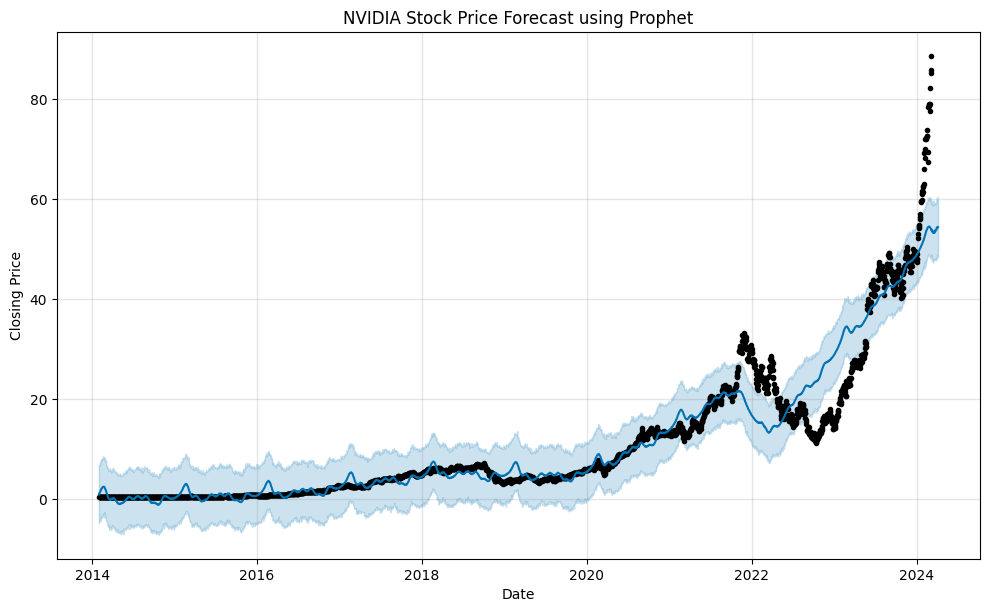

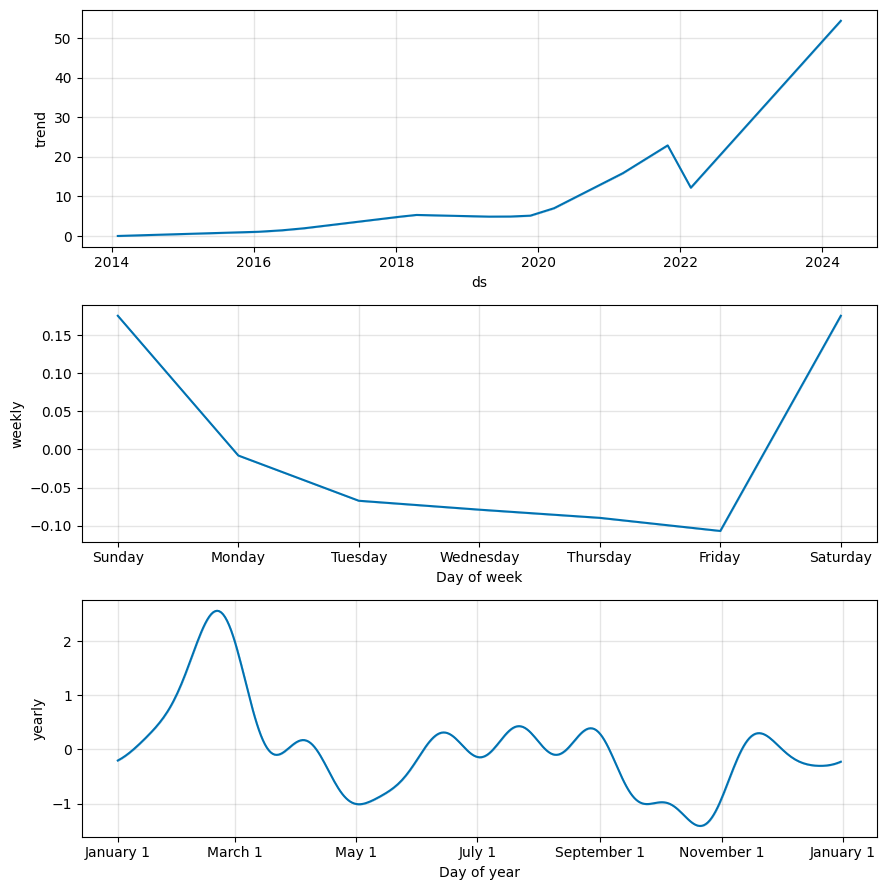

In [22]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# 1. Load and Prepare Data
df = pd.read_csv("NVIDIA_Stock_Volatility_2014_2024.csv")
df['Date'] = pd.to_datetime(df['Date'])  # Ensure 'Date' is in datetime format
df = df[['Date', 'Close']].rename(columns={'Date': 'ds', 'Close': 'y'}) # Prophet expects 'ds' and 'y'

# 2. Create and Fit the Prophet Model
model = Prophet()
model.fit(df)

# 3. Make Future Predictions
future = model.make_future_dataframe(periods=30)  # Forecast for the next 30 days
forecast = model.predict(future)

# 4. Plot the Forecast
fig = model.plot(forecast)
plt.title("NVIDIA Stock Price Forecast using Prophet")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.show()

# 5. View Forecast Components (Trend, Seasonality)
fig2 = model.plot_components(forecast)
plt.show()

In [23]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Extract actual and predicted values
y_true = df['y']  # Actual values from your historical data (df)
y_pred = forecast['yhat'][:len(df)]  # Predicted values for the historical period

# Calculate metrics
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mae = mean_absolute_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)
# Calculate MAPE
mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Display results
print("Prophet Model Performance Metrics:")
print(f"MAPE: {mape:.2f}%")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R-squared: {r2:.4f}")

Prophet Model Performance Metrics:
MAPE: 46.41%
RMSE: 4.45
MAE: 2.41
R-squared: 0.8975


Bi-LSTM

In [24]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.model_selection import train_test_split

# Load data
df = pd.read_csv('NVIDIA_Stock_Volatility_2014_2024.csv')

# Use only 'Close' for simplicity
data = df[['Close']].dropna().values

# Normalize
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

# Sequence generator
sequence_length = 60
X, y = [], []
for i in range(sequence_length, len(scaled_data)):
    X.append(scaled_data[i-sequence_length:i])
    y.append(scaled_data[i])
X, y = np.array(X), np.array(y)

# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Bidirectional, LSTM

# Model
model = Sequential()
model.add(Bidirectional(LSTM(50, return_sequences=True), input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(50)))
model.add(Dropout(0.2))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

# Train
history = model.fit(X_train, y_train, epochs=25, batch_size=32, validation_data=(X_test, y_test))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)   │ (None, 60, 100)        │        20,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 60, 100)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 100)            │        60,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 81,301 (317.58 KB)

 Trainable params: 81,301 (317.58 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/25
62/62 ━━━━━━━━━━━━━━━━━━━━ 13s 121ms/step - loss: 0.0015 - val_loss: 0.0022
Epoch 2/25
62/62 ━━━━━━━━━━━━━━━━━━━━ 9s 99ms/step - loss: 1.5692e-04 - val_loss: 0.0015
Epoch 3/25
62/62 ━━━━━━━━━━━━━━━━━━━━ 10s 100ms/step - loss: 1.7512e-04 - val_loss: 0.0018
Epoch 4/25
62/62 ━━━━━━━━━━━━━━━━━━━━ 10s 100ms/step - loss: 1.2628e-04 - val_loss: 9.0847e-04
Epoch 5/25
62/62 ━━━━━━━━━━━━━━━━━━━━ 11s 116ms/step - loss: 1.2421e-04 - val_loss: 8.9481e-04
Epoch 6/25
62/62 ━━━━━━━━━━━━━━━━━━━━ 10s 117ms/step - loss: 1.3476e-04 - val_loss: 0.0014
Epoch 7/25
62/62 ━━━━━━━━━━━━━━━━━━━━ 9s 99ms/step - loss: 9.5105e-05 - val_loss: 0.0034
Epoch 8/25
62/62 ━━━━━━━━━━━━━━━━━━━━ 7s 116ms/step - loss: 1.0640e-04 - val_loss: 5.8670e-04
Epoch 9/25
62/62 ━━━━━━━━━━━━━━━━━━━━ 10s 120ms/step - loss: 9.2536e-05 - val_loss: 8.6683e-04
Epoch 10/25
62/62 ━━━━━━━━━━━━━━━━━━━━ 10s 114ms/step - loss: 9.0729e-05 - val_loss: 0.0011
Epoch 11/25
62/62 ━━━━━━━━━━━━━━━━━━━━ 9s 98ms/step - loss: 7.0238e-05 - val_loss:

16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 70ms/step


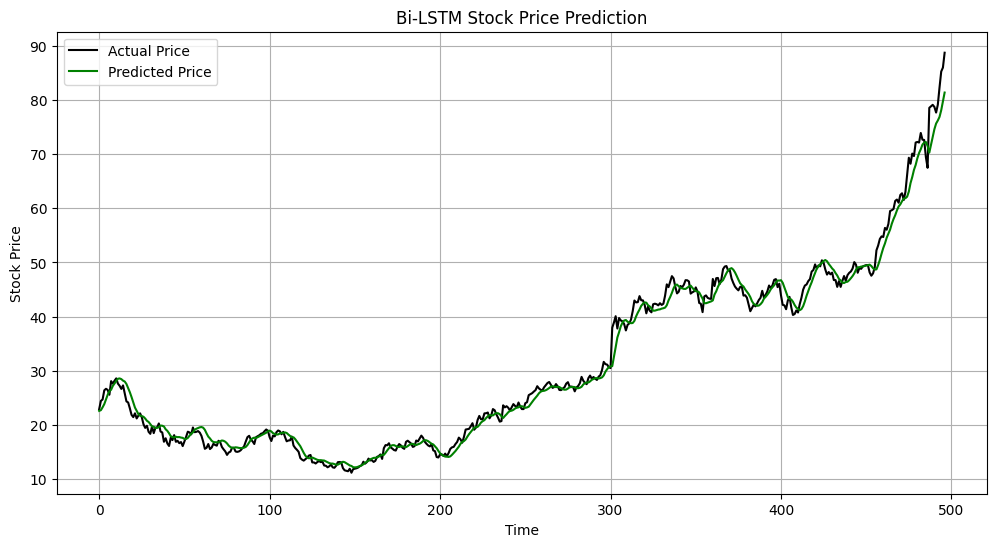

In [26]:
# Predict
y_pred = model.predict(X_test)
y_pred_rescaled = scaler.inverse_transform(y_pred)
y_test_rescaled = scaler.inverse_transform(y_test)

# Plot results
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(y_test_rescaled, label="Actual Price", color='black')
plt.plot(y_pred_rescaled, label="Predicted Price", color='green')
plt.title("Bi-LSTM Stock Price Prediction")
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.legend()
plt.grid(True)
plt.show()


In [27]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

rmse = np.sqrt(mean_squared_error(y_test_rescaled, y_pred_rescaled))
mae = mean_absolute_error(y_test_rescaled, y_pred_rescaled)
r2 = r2_score(y_test_rescaled, y_pred_rescaled)
mape = np.mean(np.abs((y_test_rescaled - y_pred_rescaled) / y_test_rescaled)) * 100

print(f"Bi-LSTM Performance:\nRMSE: {rmse:.2f}\nMAE: {mae:.2f}\nMAPE: {mape:.2f}%\nR² Score: {r2:.4f}")


Bi-LSTM Performance:
RMSE: 1.73
MAE: 1.22
MAPE: 4.17%
R² Score: 0.9894


RANDOMFOREST

In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load data
df = pd.read_csv("NVIDIA_Stock_Volatility_2014_2024.csv")

# Select features and target
features = ['Open', 'High', 'Low', 'Volume']
target = 'Close'

X = df[features].dropna()
y = df[target].dropna()

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Optional: Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [29]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)


RandomForestRegressor(random_state=42)

In [30]:
# Predict on test set
y_pred = rf_model.predict(X_test_scaled)

In [31]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100



print(f"📊 Random Forest Performance:")
print(f"MAPE     : {mape:.2f}%")
print(f"RMSE     : {rmse:.2f}")
print(f"MAE      : {mae:.2f}")
print(f"R² Score : {r2:.4f}")

📊 Random Forest Performance:
MAPE     : 1.05%
RMSE     : 0.28
MAE      : 0.14
R² Score : 0.9996


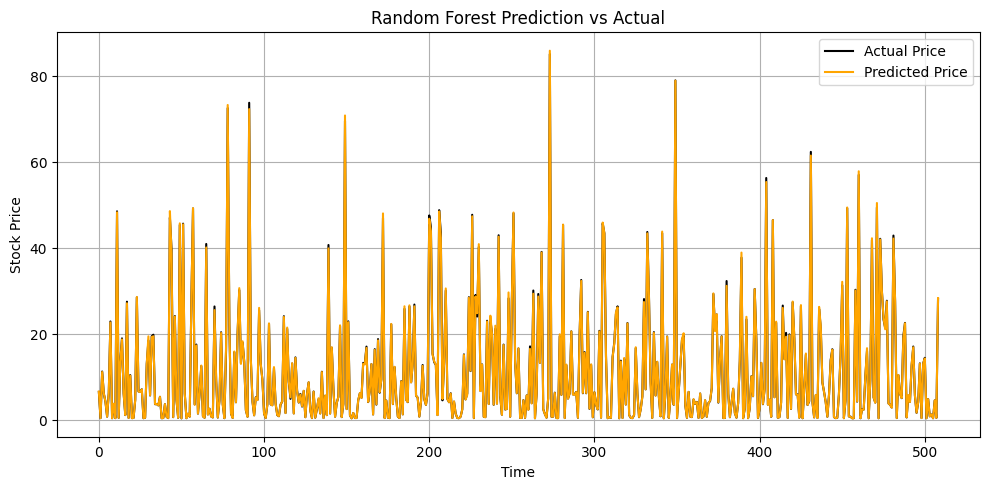

In [32]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(y_test.values, label='Actual Price', color='black')
plt.plot(y_pred, label='Predicted Price', color='orange')
plt.title('Random Forest Prediction vs Actual')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

ADDED


In [33]:
# prompt: generate the code to predict the price of next 10 days

# Load the best performing model (replace with your actual best model)
# For example, if Bi-LSTM performed best:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional

# Load data
df = pd.read_csv('NVIDIA_Stock_Volatility_2014_2024.csv')

# Use only 'Close' for simplicity
data = df[['Close']].dropna().values

# Normalize
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

# Sequence generator (use the same sequence length as training)
sequence_length = 60
# ... (rest of the model loading code from your Bi-LSTM section)


# Prepare data for prediction (next 10 days)
last_sequence = scaled_data[-sequence_length:]  # Get the last 60 days
future_predictions = []
for i in range(10):  # Predict the next 10 days
    # Reshape the input for prediction
    input_data = last_sequence.reshape(1, sequence_length, 1)
    # Make the prediction
    predicted_price = model.predict(input_data)
    # Append the prediction to the list
    future_predictions.append(predicted_price[0][0])
    # Update the last sequence with the new prediction for the next day
    last_sequence = np.append(last_sequence[1:], predicted_price)

# Inverse transform to get actual price values
future_predictions = np.array(future_predictions).reshape(-1, 1)
future_prices = scaler.inverse_transform(future_predictions)

# Print or plot the predictions for the next 10 days
print("Predicted prices for the next 10 days:")
print(future_prices)


# Optionally plot the predictions
#import matplotlib.pyplot as plt
#plt.plot(future_prices)
#plt.title("Next 10 Day Price Predictions")
#plt.xlabel("Day")
#plt.ylabel("Price")
#plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
Predicted prices for the next 10 days:
[[83.203995]
 [83.399155]
 [83.38782 ]
 [83.19073 ]
 [82.862656]
 [82.44137 ]
 [81.94517 ]
 [81.36993 ]
 [80.75755 ]
 [80.15167 ]]
